<a href="https://colab.research.google.com/github/MuhammadSaadKhan1100/CODSOFT/blob/main/Movie_genre_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Necessary Libraries for Movie genre predictor 📚 **

In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
%matplotlib inline
pd.set_option('display.max_colwidth',300)

In [ ]:
pwd

'/content'

#Importing data from Google drive🦘

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv(r'/content/drive/MyDrive/test_data.txt',sep = '\t',header = None)
train_data.head()

,0
0,"1 ::: Edgar's Lunch (1998) ::: L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. W..."
1,"2 ::: La guerra de papá (1977) ::: Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of ""prince"" of the house for his eight months old sister. So, with his brother Juan, who i..."
2,"3 ::: Off the Beaten Track (2010) ::: One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern v..."
3,"4 ::: Meu Amigo Hindu (2015) ::: His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gi..."
4,"5 ::: Er nu zhai (1955) ::: Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Ent..."


In [ ]:
train_data.tail()

,0
54195,"54196 ::: ""Tales of Light & Dark"" (2013) ::: Covering multiple genres, Tales of Light & Dark is an anthology web series by Light & Dark Productions that explores the light and dark side of humanity. Episode 1: Lolli Girl - The misadventures of a young British woman whose only want in life is to ..."
54196,"54197 ::: Der letzte Mohikaner (1965) ::: As Alice and Cora Munro attempt to find their father, a British officer in the French and Indian War, they are set upon by French soldiers and their cohorts, Huron tribesmen led by the evil Magua. Fighting to rescue the women are Chingachgook and his son..."
54197,"54198 ::: Oliver Twink (2007) ::: A movie 169 years in the making. Oliver Twist, the Artful Dodger, and Fagin. The lovers will love Fagin's waifs. Plus, there's Mr. Bumble and the hairy-chested Detective Brownlow. It's 2007, the location is South Beach FL, Fagin is a pimp and his boys are whores..."
54198,"54199 ::: Slipstream (1973) ::: Popular, but mysterious rock D.J Mike Mallard (Askew) (who broadcasts his show from an isolated farmhouse) is one day found by a four young people who land their plane nearby his farm. One of them, Kathy (Oatman), falls for Mallard who is also battling with his pr..."
54199,"54200 ::: Curitiba Zero Grau (2010) ::: Curitiba is a city in movement, with rhythms and different pulsations, a great composed mosaic for fragments of different colors and sizes, that coexist, however nor always are touched. A city of contrasts, light and darkness, indifference and solidarity, ..."


**#Separating columns based on Movie name,genre etc ✂**

#Setting data for training

In [ ]:
train_data = pd.read_csv(r"/content/drive/MyDrive/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,"Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas a..."
2,Cupid (1997),thriller,A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.
3,"Young, Wild and Wonderful (1980)",adult,"As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After..."
4,The Secret Sin (1915),drama,"To help their unemployed father make ends meet, Edith and her twin sister Grace work as seamstresses . An invalid, Grace falls prey to the temptations of Chinatown opium and becomes an addict, a condition worsened by a misguided physician who prescribes morphine to ease her pain. When their fat..."
5,The Unrecovered (2007),drama,"The film's title refers not only to the un-recovered bodies at ground zero, but also to the state of the nation at large. Set in the hallucinatory period of time between September 11 and Halloween of 2001, The Unrecovered examines the effect of terror on the average mind, the way a state of hei..."


#Setting data for testing

In [ ]:
test_data = pd.read_csv(r'/content/drive/MyDrive/test_data.txt', sep = ':::',names = ['Title','Description'] ,engine = 'python')
test_data.head()

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone ..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty child of three belonging to a wealthy middle-class family. Since Cristina's birth, he feels he has lost the privileged position of ""prince"" of the house for his eight months old sister. So, with his brother Juan, who is eight years old and is quite dis..."
3,Off the Beaten Track (2010),"One year in the life of Albin and his family of shepherds in the North of Transylvania. In direct cinema style, this documentary follows their day to day routines, and their struggle to adapt to a new world where traditions are gradually replaced by modern values. Since joining the EU, Romania ..."
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with his brother for about 10 years and has a serious cancer. Diego is a talented film director with difficulty to deal with his sickness, which is making him lose his friends and family. His best friend and doctor Ricardo gives him the news that he needs a..."
5,Er nu zhai (1955),"Before he was known internationally as a martial arts superstar, Bruce Lee had appeared in a handful of Hong Kong films as a child star in the 1940s/50s. One of these early films was The More the Merrier (1955), a.k.a. We Owe it to Our Children from the Union Film Enterprise, a family melodrama..."


# Combining test and train datasets so preprocessing(Cleaning and normalization can be performed on both sets)

In [ ]:
combined_data = pd.concat([test_data,train_data], ignore_index = True)
data = combined_data

# Uptil now we have set data for training and testing. Now its time for pre-processing and feature extraction

In [ ]:
# Dropping rows which are empty
data = data.dropna()

# Now creating a series named corpus which will go through description function
# and extract out words with similarities by applying lambda function.
# also converted to lowercase

corpus = data['Description'].apply(lambda x: re.findall(r'\w+',x.lower()))

# Now using Word2vector algorithm for converting word to vector in continuous space.
# Corpus(list of words) is used to train the model using this algorithm.
# We will pass 5 parameters in this algorithm
# . corpus; list os similar words found in description
# . vector_size; dimensionality of two vectors
# . window; distance b/w predicted and actual word
# . min_count; minimum no. of occurances to be included in vocabulary
# . workers; no. of cpu cores used to train model in parallel

word2vec_model = Word2Vec(corpus,vector_size = 100,window = 5 ,min_count = 1, workers = 4 )

# Now we will create a function named get_sentence_embedding which will take sentence as input and return its embedding.
# It first converts sentence into lowercase and then extract out words using same pattern i.e '\w'.
# then it retrieves words from Word2Vector Model that is in model's vocabulary
# next it calculates average of the word vectors to get embedding for the entire sentence and
# incase of invalid vectors(out of vocabulary words) it will return zero vector

def get_sentence_embedding(sentence):
  words = re.findall(r'\w',sentence.lower())
  vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
  return sum[vectors]/len[vectors] if vectors else [0] * 100

  # Now we are going to Apply this get_sentence_embedding function on Description column and save it in new name embeddings
  data['embeddings'] = data['Description'].apply(get_sentence_embedding)

  # Now we are going to create a new dataframe X which will convert list of embeddings into a dataframe.
  # Rows contribute to Description
  # Columns contribute to dimensions of embeddings

  X = pd.DataFrame(data['embeddings'].to_list())

  # Now we are creating LabelEncoder object which will convert catagorical type of genre to numerical values
  # It then applies fit_transform() method of LabelEncoder to Genre column of data. This assigns
  # a unique NumericalLabel to each genre and adds a new column named "genre encoded"

  LabelEncoder = LabelEncoder()
  data['genre_encoded'] = LabelEncoder.fit_transform(data['Genre'])

KeyError: ignored

# **So, now we are going to plot data**

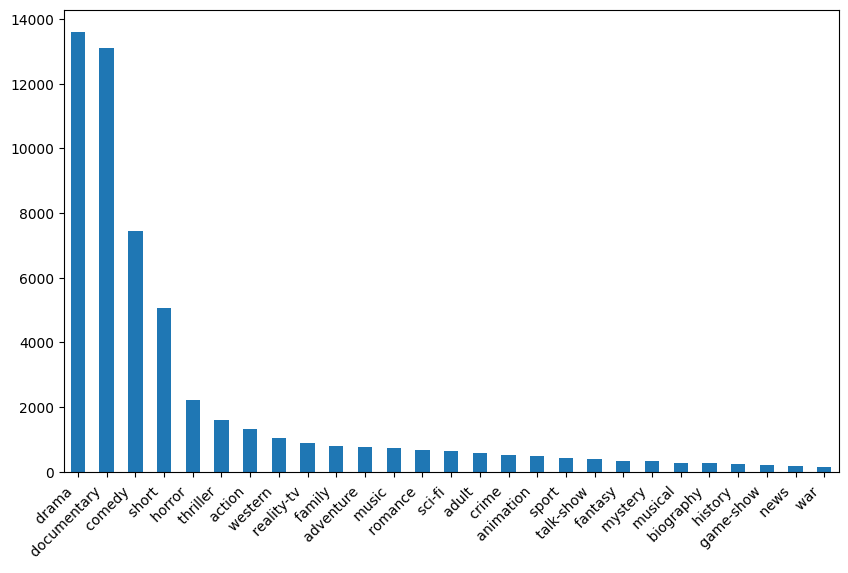

In [ ]:
plt.figure(figsize = (10,6))
genre_counts = data["Genre"].value_counts()
genre_counts.plot(kind = "bar")
plt.xlabel = ("genre")
plt.ylabel = ("count")
plt.title = ("Genre Distribution")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

# **Now Applying Model Random classifier**

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

def get_sentence_embedding(sentence):
    words = re.findall(r'\w+', sentence.lower())
    vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return sum(vectors) / len(vectors) if vectors else [0] * 100

def train_model():
    train_data = pd.read_csv(r"/content/drive/MyDrive/train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
    test_data = pd.read_csv(r'/content/drive/MyDrive/test_data.txt', sep = ':::',names = ['Title','Description'] ,engine = 'python')
    combined_data = pd.concat([train_data, test_data], ignore_index=True)
    data = combined_data
    data = data.dropna()
    corpus = data["Description"].apply(lambda x: re.findall(r'\w+', x.lower()))
    word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)


    def get_sentence_embedding(sentence):
        words = re.findall(r'\w+', sentence.lower())
        vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
        return sum(vectors) / len(vectors) if vectors else [0] * 100

    data["embeddings"] = data["Description"].apply(get_sentence_embedding)
    X = pd.DataFrame(data["embeddings"].to_list())
    label_encoder = LabelEncoder()
    data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])
    y = data["genre_encoded"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    return model, label_encoder

def predict_genre(model, label_encoder, new_descriptions):
    new_embeddings = [get_sentence_embedding(desc) for desc in new_descriptions]
    new_X = pd.DataFrame(new_embeddings)
    new_predictions = model.predict(new_X)
    predicted_genres = label_encoder.inverse_transform(new_predictions)

    return predicted_genres

trained_model, genre_label_encoder = train_model()

new_descriptions = ["A group of friends embark on an adventurous journey.","In a dystopian future, a hero rises to save the world.","A heartwarming story of family and friendship."]


predicted_genres = predict_genre(trained_model, genre_label_encoder, new_descriptions)

for desc, genre in zip(new_descriptions, predicted_genres):
    print(f"Description: {desc}")
    print(f"Predicted Genre: {genre}")
    print()

<ipython-input-3-25bc5cd3b6de>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["embeddings"] = data["Description"].apply(get_sentence_embedding)
<ipython-input-3-25bc5cd3b6de>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genre_encoded"] = label_encoder.fit_transform(data["Genre"])


NameError: ignored